Implementation of fuzzy C-means clustering

In [ ]:
import pandas as pd
import numpy as np
import random
import operator
import math
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [ ]:
path="/content/drive/MyDrive/Colab Notebooks/Datasets/iris.data.csv"
df_full=pd.read_csv(path)

In [ ]:
df_full.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
df_full.shape

(149, 5)

In [ ]:
columns = list(df_full.columns)
features = columns[:len(columns)-1]
class_labels = list(df_full[columns[-1]])
df = df_full[features]

Defining parameters

In [ ]:
k = 3
MAX_ITER = 100
n = len(df)
m = 1.7

Scatter Plots

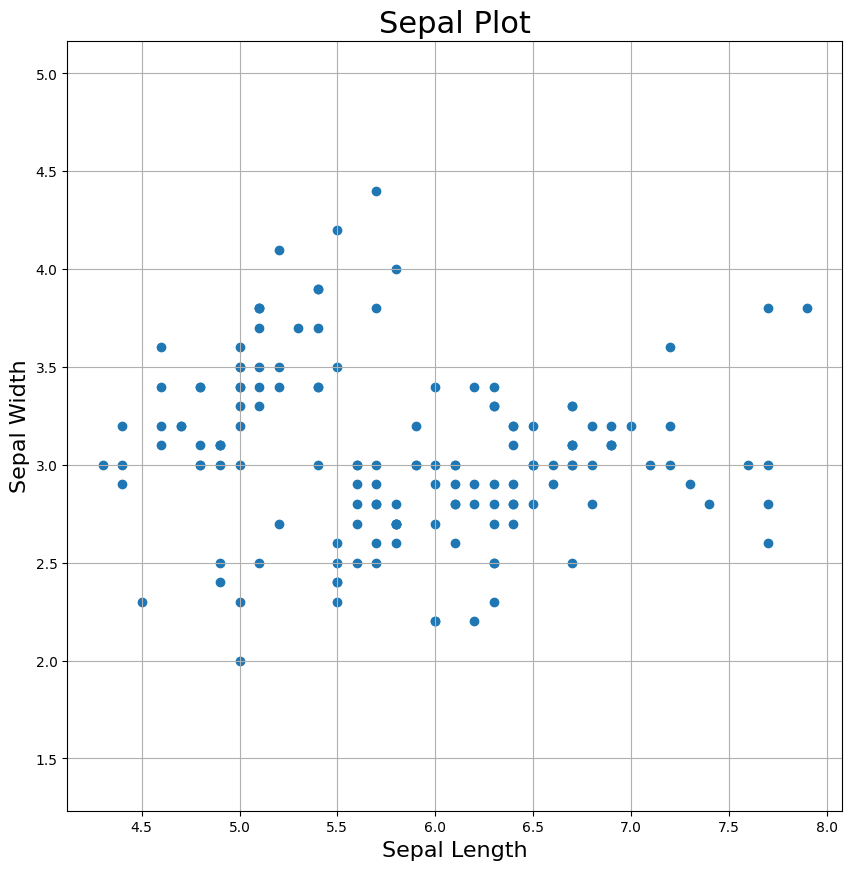

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(list(df.iloc[:,0]), list(df.iloc[:,1]), marker='o')
plt.axis('equal')
plt.xlabel('Sepal Length', fontsize=16)
plt.ylabel('Sepal Width', fontsize=16)
plt.title('Sepal Plot', fontsize=22)
plt.grid()
plt.show()

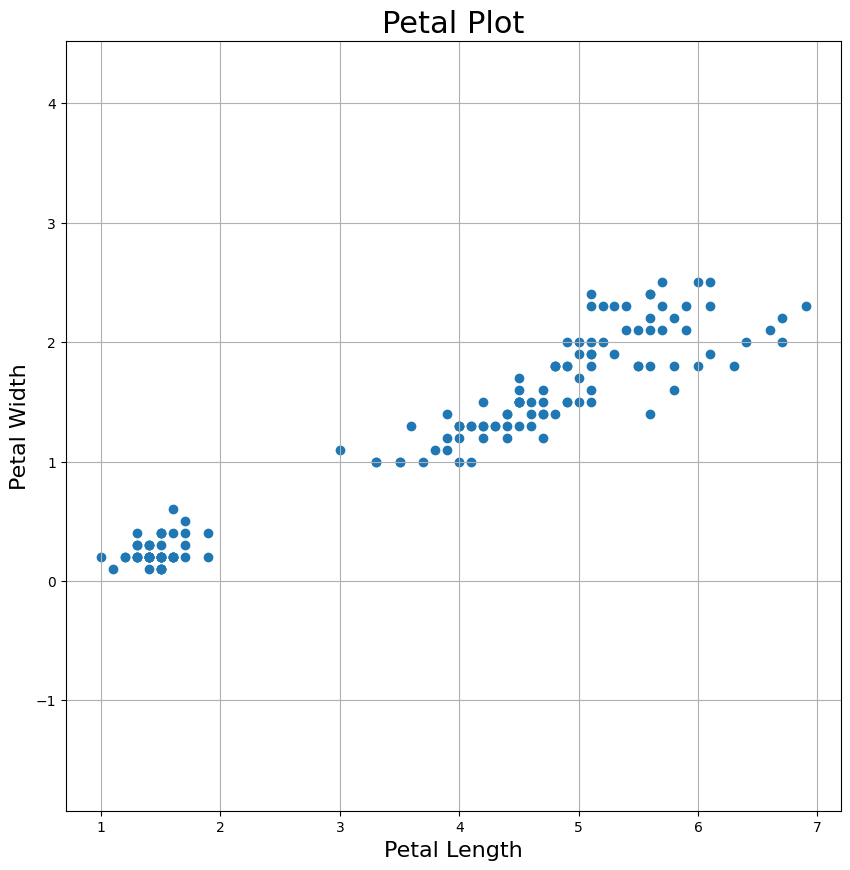

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(list(df.iloc[:,2]), list(df.iloc[:,3]), marker='o')
plt.axis('equal')
plt.xlabel('Petal Length', fontsize=16)
plt.ylabel('Petal Width', fontsize=16)
plt.title('Petal Plot', fontsize=22)
plt.grid()
plt.show()

Calculating accuracy

In [ ]:
def accuracy(cluster_labels, class_labels):
    correct_pred = 0
    #print(cluster_labels)
    seto = max(set(labels[0:50]), key=labels[0:50].count)
    vers = max(set(labels[50:100]), key=labels[50:100].count)
    virg = max(set(labels[100:]), key=labels[100:].count)

    for i in range(len(df)):
        if cluster_labels[i] == seto and class_labels[i] == 'Iris-setosa':
            correct_pred = correct_pred + 1
        if cluster_labels[i] == vers and class_labels[i] == 'Iris-versicolor' and vers!=seto:
            correct_pred = correct_pred + 1
        if cluster_labels[i] == virg and class_labels[i] == 'Iris-virginica' and virg!=seto and virg!=vers:
            correct_pred = correct_pred + 1

    accuracy = (correct_pred/len(df))*100
    return accuracy

Initialize membership matrix

In [ ]:
def initializeMembershipMatrix():
    membership_mat = []
    for i in range(n):
        random_num_list = [random.random() for i in range(k)]
        summation = sum(random_num_list)
        temp_list = [x/summation for x in random_num_list]

        flag = temp_list.index(max(temp_list))
        for j in range(0,len(temp_list)):
            if(j == flag):
                temp_list[j] = 1
            else:
                temp_list[j] = 0

        membership_mat.append(temp_list)
    return membership_mat

In [ ]:
membership_mat = initializeMembershipMatrix()

Calculating Cluster Center

In [ ]:
def calculateClusterCenter(membership_mat):
    cluster_mem_val = list(zip(*membership_mat))
    cluster_centers = []
    for j in range(k):
        x = list(cluster_mem_val[j])
        xraised = [p ** m for p in x]
        denominator = sum(xraised)
        temp_num = []
        for i in range(n):
            data_point = list(df.iloc[i])
            prod = [xraised[i] * val for val in data_point]
            temp_num.append(prod)
        numerator = map(sum, list(zip(*temp_num)))
        center = [z/denominator for z in numerator]
        cluster_centers.append(center)
    return cluster_centers

In [ ]:
calculateClusterCenter(membership_mat)

[[5.7714285714285705,
  3.0510204081632657,
  3.7448979591836715,
  1.1816326530612242],
 [5.8612244897959185,
  3.038775510204082,
  3.7693877551020405,
  1.214285714285714],
 [5.909803921568626,
  3.0627450980392155,
  3.8078431372549018,
  1.2196078431372546]]

Updating Membership Value

In [ ]:
def updateMembershipValue(membership_mat, cluster_centers):
    p = float(2/(m-1))
    for i in range(n):
        x = list(df.iloc[i])
        distances = [np.linalg.norm(np.array(list(map(operator.sub, x, cluster_centers[j])))) for j in range(k)]
        for j in range(k):
            den = sum([math.pow(float(distances[j]/distances[c]), p) for c in range(k)])
            membership_mat[i][j] = float(1/den)
    return membership_mat

Getting the clusters

In [ ]:
def getClusters(membership_mat):
    cluster_labels = list()
    for i in range(n):
        max_val, idx = max((val, idx) for (idx, val) in enumerate(membership_mat[i]))
        cluster_labels.append(idx)
    return cluster_labels

Fuzzy C-Means with cluster centres at the origin

In [ ]:
def fuzzyCMeansClustering(): #First Iteration with centers at 0
    membership_mat = initializeMembershipMatrix()
    curr = 0
    acc=[]
    cent_temp = [[0, 0, 0, 0],[0, 0, 0, 0],[0, 0, 0, 0]]
    while curr < MAX_ITER:
        if(curr == 0):
            cluster_centers = cent_temp
            print("Cluster Centers:")
            print(np.array(cluster_centers))
        else:
            cluster_centers = calculateClusterCenter(membership_mat)
        membership_mat = updateMembershipValue(membership_mat, cluster_centers)
        cluster_labels = getClusters(membership_mat)
        acc.append(cluster_labels)
        curr += 1
    print("---------------------------")
    print("Membership Matrix:")
    print(np.array(membership_mat))
    return cluster_labels, cluster_centers, acc

Fuzzy C-Means with with cluster centers at random locations within a multi-variate Gaussian distribution with zero-mean and unit-variance.

In [ ]:
def fuzzyCMeansClustering(): #Second Iteration Multivariate Gaussian
    # Membership Matrix
    membership_mat = initializeMembershipMatrix()
    curr = 0
    acc=[]
    mean = [0, 0]
    cov = [[1, 0], [0, 1]]

    lis1,cent_temp=[],[]

    for i in range(0,k):
        Z = list(np.random.multivariate_normal(mean, cov))
        Z1 = list(np.random.multivariate_normal(mean, cov))
        lis1 = Z+Z1
        cent_temp.append(lis1)


    while curr < MAX_ITER:
        if(curr == 0):
            cluster_centers = cent_temp
            print("Cluster Centers:")
            print(np.array(cluster_centers))
        else:
            cluster_centers = calculateClusterCenter(membership_mat)
        #cluster_centers = calculateClusterCenter(membership_mat)
        membership_mat = updateMembershipValue(membership_mat, cluster_centers)
        cluster_labels = getClusters(membership_mat)
        acc.append(cluster_labels)
        curr += 1
    print("---------------------------")
    print("Membership Matrix:")
    print(np.array(membership_mat))
    return cluster_labels, cluster_centers, acc

Fuzzy C-Means with cluster centers at random vectors chosen from the data.

In [ ]:
def fuzzyCMeansClustering(): #Third iteration Random vectors from data
    # Membership Matrix
    membership_mat = initializeMembershipMatrix()
    curr = 0
    acc=[]
    while curr < MAX_ITER:
        cluster_centers = calculateClusterCenter(membership_mat)
        membership_mat = updateMembershipValue(membership_mat, cluster_centers)
        cluster_labels = getClusters(membership_mat)

        acc.append(cluster_labels)

        if(curr == 0):
            print("Cluster Centers:")
            print(np.array(cluster_centers))
        curr += 1
    print("---------------------------")
    print("Partition matrix:")
    print(np.array(membership_mat))
    #return cluster_labels, cluster_centers
    return cluster_labels, cluster_centers, acc

Calculating the Accuracy

In [ ]:
labels, centers, acc = fuzzyCMeansClustering()
a = accuracy(labels, class_labels)

Cluster Centers:
[[5.8509434  3.12075472 3.68113208 1.2       ]
 [5.72653061 3.07959184 3.6244898  1.14897959]
 [5.97234043 2.94255319 4.03617021 1.27021277]]
---------------------------
Partition matrix:
[[2.78833069e-03 9.96336441e-01 8.75228053e-04]
 [2.15529151e-03 9.97133549e-01 7.11159680e-04]
 [4.42399493e-03 9.94189634e-01 1.38637116e-03]
 [3.76718318e-04 9.99497377e-01 1.25905065e-04]
 [1.30711146e-02 9.82687601e-01 4.24128432e-03]
 [2.27904316e-03 9.96973014e-01 7.47943318e-04]
 [8.41361577e-06 9.99988918e-01 2.66811684e-06]
 [1.37087439e-02 9.81872611e-01 4.41864475e-03]
 [1.70288732e-03 9.97767128e-01 5.29984370e-04]
 [4.49067880e-03 9.94012300e-01 1.49702112e-03]
 [5.75470638e-04 9.99245392e-01 1.79137517e-04]
 [3.72858546e-03 9.95084521e-01 1.18689359e-03]
 [1.56524766e-02 9.78846399e-01 5.50112451e-03]
 [2.69950844e-02 9.62599356e-01 1.04055598e-02]
 [4.77414466e-02 9.33745545e-01 1.85130087e-02]
 [9.27932614e-03 9.87408711e-01 3.31196279e-03]
 [1.84841527e-04 9.99754780

In [ ]:
acc_lis = []
for i in range(0,len(acc)):
    val = accuracy(acc[i], class_labels)
    acc_lis.append(val)

In [ ]:
acc_lis = np.array(acc_lis) #calculating accuracy and std deviation 100 times
print("mean=",np.mean(acc_lis))
print("Std dev=",np.std(acc_lis))

mean= 88.14093959731545
Std dev= 3.29755660375603


In [ ]:
print("Accuracy = " + str(round(a, 2)))

Accuracy = 88.59


In [ ]:
print("Cluster center vectors:") #final cluster centers
print(np.array(centers))

Cluster center vectors:
[[5.88784622 2.75277166 4.36964283 1.40591899]
 [5.00325661 3.4056063  1.48223656 0.25192033]
 [6.80727582 3.05993094 5.68338273 2.06094362]]


Plotting the data

In [ ]:
sepal_df = df_full.iloc[:,0:2]
sepal_df = np.array(sepal_df)

In [ ]:
m1 = random.choice(sepal_df)
m2 = random.choice(sepal_df)
m3 = random.choice(sepal_df)

cov1 = np.cov(np.transpose(sepal_df))
cov2 = np.cov(np.transpose(sepal_df))
cov3 = np.cov(np.transpose(sepal_df))

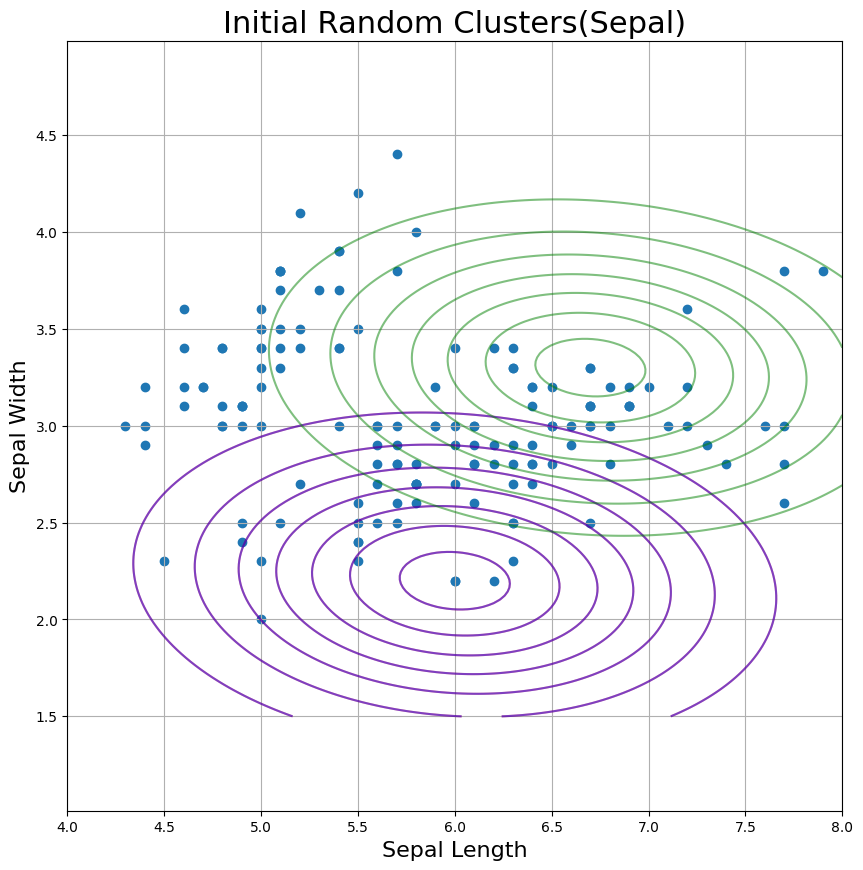

In [ ]:
x1 = np.linspace(4,8,150)
x2 = np.linspace(1.5,4.5,150)
#x1 = np.linspace(-1,8,150)
#x2 = np.linspace(-1,4.5,150)
X, Y = np.meshgrid(x1,x2)

Z1 = multivariate_normal(m1, cov1)
Z2 = multivariate_normal(m2, cov2)
Z3 = multivariate_normal(m3, cov3)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

plt.figure(figsize=(10,10))
plt.scatter(sepal_df[:,0], sepal_df[:,1], marker='o')
plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5)
plt.contour(X, Y, Z2.pdf(pos), colors="b" ,alpha = 0.5)
plt.contour(X, Y, Z3.pdf(pos), colors="g" ,alpha = 0.5)
plt.axis('equal')
plt.xlabel('Sepal Length', fontsize=16)
plt.ylabel('Sepal Width', fontsize=16)
plt.title('Initial Random Clusters(Sepal)', fontsize=22)
plt.grid()
plt.show()

In [ ]:
petal_df = df_full.iloc[:,2:4]
petal_df = np.array(petal_df)

In [ ]:
m1 = random.choice(petal_df)
m2 = random.choice(petal_df)
m3 = random.choice(petal_df)
cov1 = np.cov(np.transpose(petal_df))
cov2 = np.cov(np.transpose(petal_df))
cov3 = np.cov(np.transpose(petal_df))

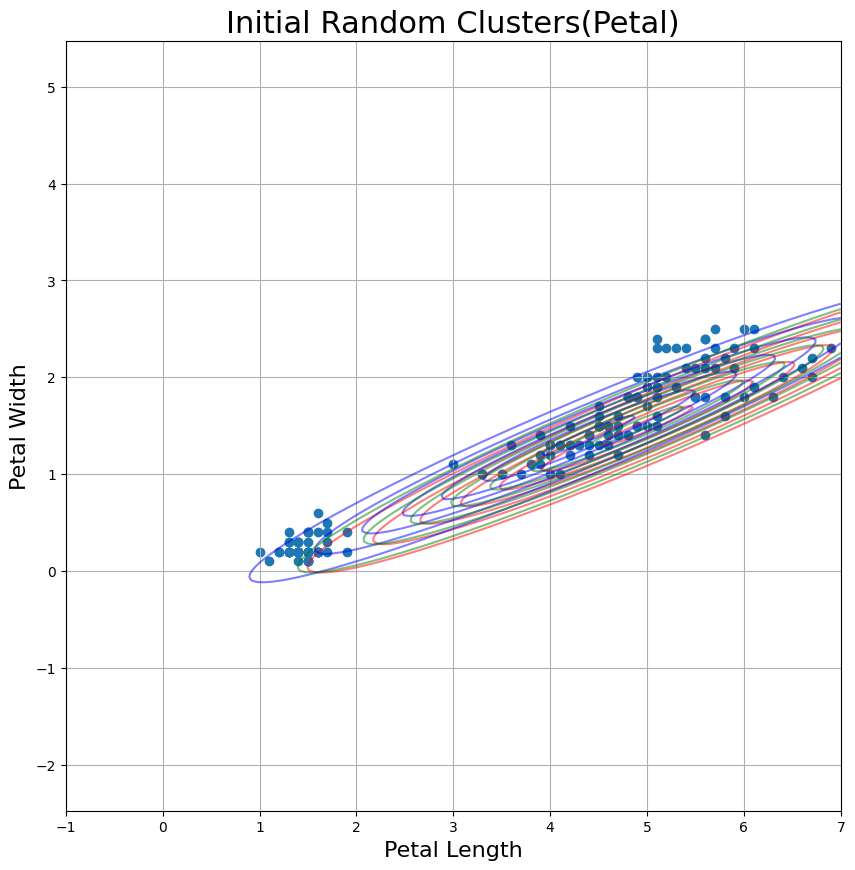

In [ ]:
x1 = np.linspace(-1,7,150)
x2 = np.linspace(-1,4,150)
X, Y = np.meshgrid(x1,x2)

Z1 = multivariate_normal(m1, cov1)
Z2 = multivariate_normal(m2, cov2)
Z3 = multivariate_normal(m3, cov3)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

plt.figure(figsize=(10,10))
plt.scatter(petal_df[:,0], petal_df[:,1], marker='o')
plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5)
plt.contour(X, Y, Z2.pdf(pos), colors="b" ,alpha = 0.5)
plt.contour(X, Y, Z3.pdf(pos), colors="g" ,alpha = 0.5)
plt.axis('equal')
plt.xlabel('Petal Length', fontsize=16)
plt.ylabel('Petal Width', fontsize=16)
plt.title('Initial Random Clusters(Petal)', fontsize=22)
plt.grid()
plt.show()

In [ ]:
seto = max(set(labels[0:50]), key=labels[0:50].count)
vers = max(set(labels[50:100]), key=labels[50:100].count)
virg = max(set(labels[100:]), key=labels[100:].count)

In [ ]:
s_mean_clus1 = np.array([centers[seto][0],centers[seto][1]])
s_mean_clus2 = np.array([centers[vers][0],centers[vers][1]])
s_mean_clus3 = np.array([centers[virg][0],centers[virg][1]])

In [ ]:
values = np.array(labels) #label

searchval_seto = seto
searchval_vers = vers
searchval_virg = virg

ii_seto = np.where(values == searchval_seto)[0]
ii_vers = np.where(values == searchval_vers)[0]
ii_virg = np.where(values == searchval_virg)[0]
ind_seto = list(ii_seto)
ind_vers = list(ii_vers)
ind_virg = list(ii_virg)

In [ ]:
sepal_df = df_full.iloc[:,0:2]

In [ ]:
seto_df = sepal_df[sepal_df.index.isin(ind_seto)]
vers_df = sepal_df[sepal_df.index.isin(ind_vers)]
virg_df = sepal_df[sepal_df.index.isin(ind_virg)]

In [ ]:
cov_seto = np.cov(np.transpose(np.array(seto_df)))
cov_vers = np.cov(np.transpose(np.array(vers_df)))
cov_virg = np.cov(np.transpose(np.array(virg_df)))

In [ ]:
sepal_df = np.array(sepal_df)

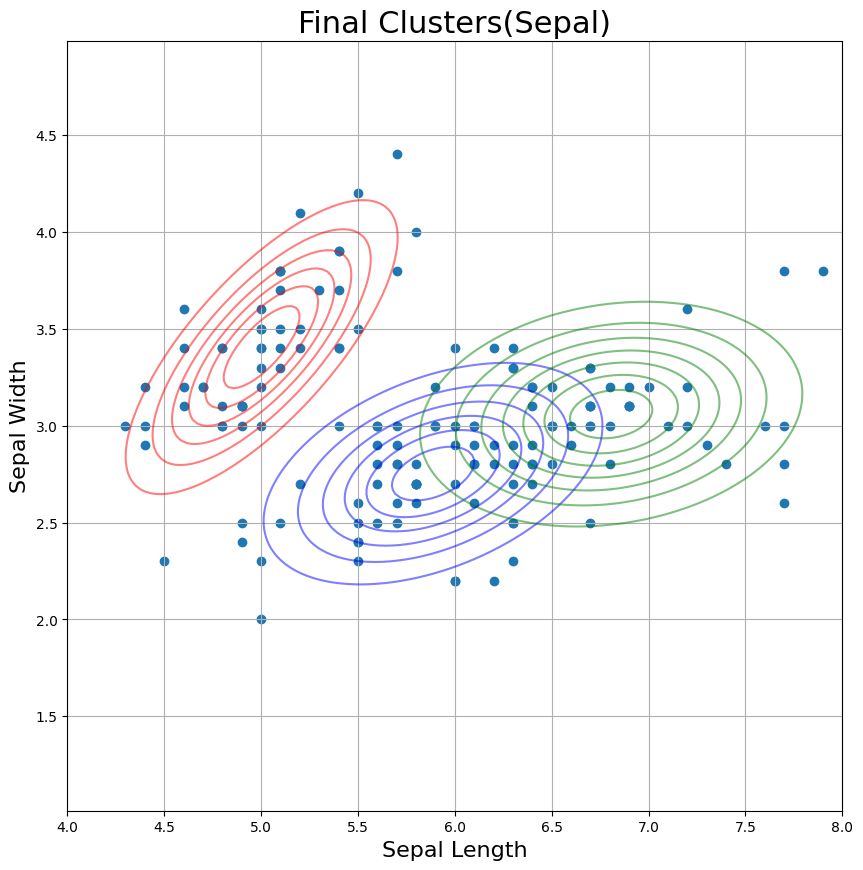

In [ ]:
x1 = np.linspace(4,8,150)
x2 = np.linspace(1.5,4.5,150)
X, Y = np.meshgrid(x1,x2)

Z1 = multivariate_normal(s_mean_clus1, cov_seto)
Z2 = multivariate_normal(s_mean_clus2, cov_vers)
Z3 = multivariate_normal(s_mean_clus3, cov_virg)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

plt.figure(figsize=(10,10))
plt.scatter(sepal_df[:,0], sepal_df[:,1], marker='o')
plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5)
plt.contour(X, Y, Z2.pdf(pos), colors="b" ,alpha = 0.5)
plt.contour(X, Y, Z3.pdf(pos), colors="g" ,alpha = 0.5)
plt.axis('equal')
plt.xlabel('Sepal Length', fontsize=16)
plt.ylabel('Sepal Width', fontsize=16)
plt.title('Final Clusters(Sepal)', fontsize=22)
plt.grid()
plt.show()

In [ ]:
p_mean_clus1 = np.array([centers[seto][2],centers[seto][3]])
p_mean_clus2 = np.array([centers[vers][2],centers[vers][3]])
p_mean_clus3 = np.array([centers[virg][2],centers[virg][3]])

In [ ]:
petal_df = df_full.iloc[:,2:4]

In [ ]:
seto_df = petal_df[petal_df.index.isin(ind_seto)]
vers_df = petal_df[petal_df.index.isin(ind_vers)]
virg_df = petal_df[petal_df.index.isin(ind_virg)]

In [ ]:
cov_seto = np.cov(np.transpose(np.array(seto_df)))
cov_vers = np.cov(np.transpose(np.array(vers_df)))
cov_virg = np.cov(np.transpose(np.array(virg_df)))

In [ ]:
petal_df = np.array(petal_df)

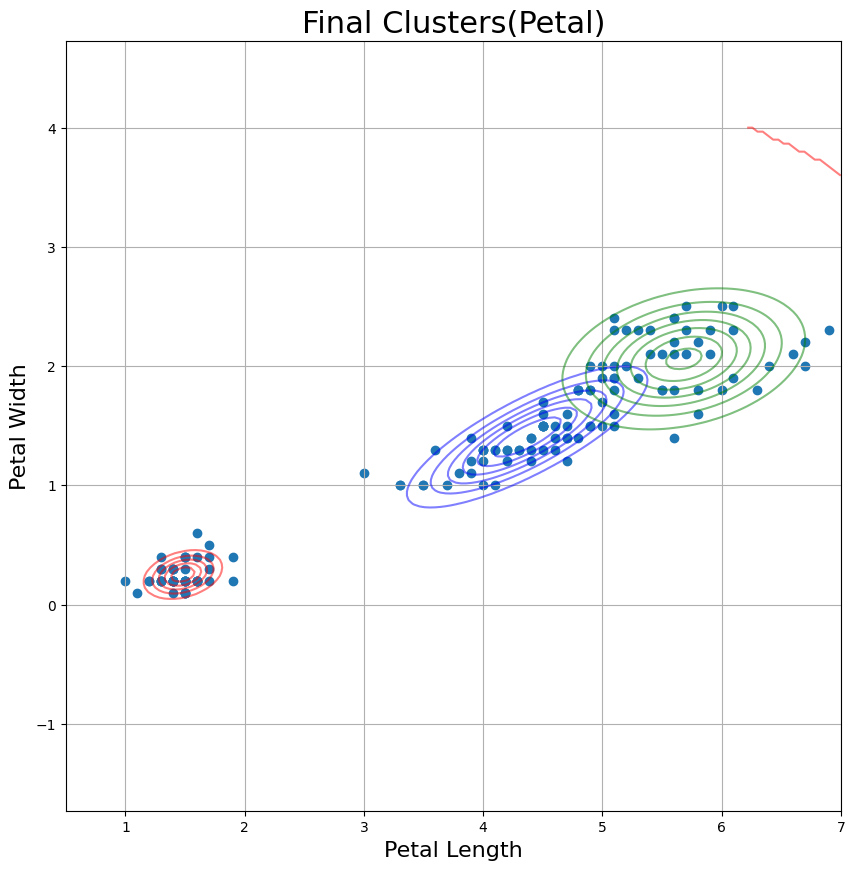

In [ ]:
x1 = np.linspace(0.5,7,150)
x2 = np.linspace(-1,4,150)
X, Y = np.meshgrid(x1,x2)

Z1 = multivariate_normal(p_mean_clus1, cov_seto)
Z2 = multivariate_normal(p_mean_clus2, cov_vers)
Z3 = multivariate_normal(p_mean_clus3, cov_virg)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

plt.figure(figsize=(10,10))
plt.scatter(petal_df[:,0], petal_df[:,1], marker='o')
plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5)
plt.contour(X, Y, Z2.pdf(pos), colors="b" ,alpha = 0.5)
plt.contour(X, Y, Z3.pdf(pos), colors="g" ,alpha = 0.5)
plt.axis('equal')
plt.xlabel('Petal Length', fontsize=16)
plt.ylabel('Petal Width', fontsize=16)
plt.title('Final Clusters(Petal)', fontsize=22)
plt.grid()
plt.show()